In [1]:
%load_ext autoreload
%autoreload 1
%autosave 60

Autosaving every 60 seconds


In [2]:
import sys
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm
import scanpy
import gseapy as gp

In [3]:
sys.path.append("/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/")

In [4]:
import rnaseq
importlib.reload(rnaseq)

<module 'rnaseq' from '/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/__init__.py'>

In [5]:
%%bash
pwd

/u/davidm/Documents/Master-thesis/Projects/scBC-Analysis/0_Preprocessing/2_Cells-filtering/dsp779


In [6]:
# %%bash
# tar czf ./figs.tar.gz ./figs/*.pdf

### Plotting parameters

In [7]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 110
plt.rcParams['font.size'] = 6

### Genes lists

In [8]:
cell_cycle_genes = np.array(['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG',
       'GINS2', 'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'HELLS', 'RFC2',
       'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2',
       'UBR7', 'POLD3', 'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6',
       'EXO1', 'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN',
       'POLA1', 'CHAF1B', 'BRIP1', 'E2F8', 'HMGB2', 'CDK1', 'NUSAP1',
       'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80', 'CKS2', 'NUF2',
       'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'SMC4', 'CCNB2',
       'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E', 'TUBB4B',
       'GTSE1', 'KIF20B', 'HJURP', 'CDCA3', 'CDC20', 'TTK', 'CDC25C',
       'KIF2C', 'RANGAP1', 'NCAPD2', 'DLGAP5', 'CDCA2', 'CDCA8', 'ECT2',
       'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5', 'CENPE',
       'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA'])

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

In [9]:
g2m_genes = ['ABL1', 'AMD1', 'ARID4A', 'ATF5', 'ATRX', 'AURKA', 'AURKB',
       'BARD1', 'BCL3', 'BIRC5', 'BRCA2', 'BUB1', 'BUB3', 'CASP8AP2',
       'CBX1', 'CCNA2', 'CCNB2', 'CCND1', 'CCNF', 'CCNT1', 'CDC20',
       'CDC25A', 'CDC25B', 'CDC27', 'CDC45', 'CDC6', 'CDC7', 'CDK1',
       'CDK4', 'CDKN1B', 'CDKN2C', 'CDKN3', 'CENPA', 'CENPE', 'CENPF',
       'CHAF1A', 'CHEK1', 'CHMP1A', 'CKS1B', 'CKS2', 'CTCF', 'CUL1',
       'CUL3', 'CUL4A', 'CUL5', 'DBF4', 'DDX39A', 'DKC1', 'DMD', 'DR1',
       'DTYMK', 'E2F1', 'E2F2', 'E2F3', 'E2F4', 'EFNA5', 'EGF', 'ESPL1',
       'EWSR1', 'EXO1', 'EZH2', 'FANCC', 'FBXO5', 'FOXN3', 'G3BP1',
       'GINS2', 'GSPT1', 'H2AX', 'H2AZ1', 'H2AZ2', 'H2BC12', 'HIF1A',
       'HIRA', 'HMGA1', 'HMGB3', 'HMGN2', 'HMMR', 'HNRNPD', 'HNRNPU',
       'HOXC10', 'HSPA8', 'HUS1', 'ILF3', 'INCENP', 'JPT1', 'KATNA1',
       'KIF11', 'KIF15', 'KIF20B', 'KIF22', 'KIF23', 'KIF2C', 'KIF4A',
       'KIF5B', 'KMT5A', 'KNL1', 'KPNA2', 'KPNB1', 'LBR', 'LIG3', 'LMNB1',
       'MAD2L1', 'MAP3K20', 'MAPK14', 'MARCKS', 'MCM2', 'MCM3', 'MCM5',
       'MCM6', 'MEIS1', 'MEIS2', 'MKI67', 'MNAT1', 'MT2A', 'MTF2',
       'MYBL2', 'MYC', 'NASP', 'NCL', 'NDC80', 'NEK2', 'NOLC1', 'NOTCH2',
       'NSD2', 'NUMA1', 'NUP50', 'NUP98', 'NUSAP1', 'ODC1', 'ODF2',
       'ORC5', 'ORC6', 'PAFAH1B1', 'PBK', 'PDS5B', 'PLK1', 'PLK4', 'PML',
       'POLA2', 'POLE', 'POLQ', 'PRC1', 'PRIM2', 'PRMT5', 'PRPF4B',
       'PTTG1', 'PTTG3P', 'PURA', 'RACGAP1', 'RAD21', 'RAD23B', 'RAD54L',
       'RASAL2', 'RBL1', 'RBM14', 'RPA2', 'RPS6KA5', 'SAP30', 'SFPQ',
       'SLC12A2', 'SLC38A1', 'SLC7A1', 'SLC7A5', 'SMAD3', 'SMARCC1',
       'SMC1A', 'SMC2', 'SMC4', 'SNRPD1', 'SQLE', 'SRSF1', 'SRSF10',
       'SRSF2', 'SS18', 'STAG1', 'STIL', 'STMN1', 'SUV39H1', 'SYNCRIP',
       'TACC3', 'TENT4A', 'TFDP1', 'TGFB1', 'TLE3', 'TMPO', 'TNPO2',
       'TOP1', 'TOP2A', 'TPX2', 'TRA2B', 'TRAIP', 'TROAP', 'TTK', 'UBE2C',
       'UBE2S', 'UCK2', 'UPF1', 'WRN', 'XPO1', 'YTHDC1']

### Load sample

In [10]:
sample = "Sample_N701_-_Not_Transfected"
new_sample_name = "NT"
quant_params = "trimmed-reads-cutadapt-all/decoys-k19-1.4.0/customWh-top-3000"
genref = "human/assembly__GRCh38-hg38/annotation__gencode/gencode_34"
project = "dsp779"
cell_line = "MCF7"

In [11]:
sc = rnaseq.readwrite.read_raw(project_id  = project, quant_tool = "alevin", samples = sample, genes_id = "ensembl_gene_id", quant_params = quant_params, genref = genref, cdna = "3' tag", exp = "sc")
sc.obs_names = sc.obs["CB"].tolist()

/home/arion/davidm/Data/datasets/raw/private/RNA-seq/sc/dsp779/quant/alevin/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/trimmed-reads-cutadapt-all/decoys-k19-1.4.0/customWh-top-3000
Using BioMart Ensembl Genes 100 hsapiens_gene_ensembl for gene annotations.


In [12]:
rnaseq.setup.annotate_samples(sc, samples_annot_name = "samples", samples_annot = new_sample_name, ow = True)
rnaseq.setup.annotate_samples(sc, samples_annot_name = "cell_line", samples_annot = cell_line, ow = True)

rnaseq.setup.annotate_samples(sc, samples_annot_name = "total_UMIs", samples_annot = sc.X.toarray().sum(1).ravel())
rnaseq.setup.annotate_samples(sc, samples_annot_name = "#_genes", samples_annot = (sc.X.toarray() != 0).sum(1).ravel())
rnaseq.setup.annotate_samples(sc, samples_annot_name = "max_corr")
rnaseq.setup.annotate_samples(sc, samples_annot_name = "mt_frac")
rnaseq.setup.annotate_samples(sc, samples_annot_name = "rp_frac")

rnaseq.setup.annotate_genes(sc, "gene_biotype")

Annotating samples...
Annotating cell_line...
Annotating total_UMIs...
Annotating #_genes...
Annotating max_corr...
Normalization by total UMIs...
Log2 + 1 tranformation...
Annotating mt_frac...
Annotating chromosome_name using Biomart (Ensembl Genes 100, 'hsapiens_gene_ensembl')...
Annotating rp_frac...
Annotating external_gene_name using Biomart (Ensembl Genes 100, 'hsapiens_gene_ensembl')...
Annotating gene_biotype using Biomart (Ensembl Genes 100, 'hsapiens_gene_ensembl')...


In [13]:
sc.X.shape

(2271, 60240)

In [14]:
sc._inplace_subset_obs(sc.obs["total_UMIs"] > 100)

In [15]:
# x = sc.layers["raw"].toarray()[:, (sc.var["gene_biotype"] == "lncRNA") & (sc.var["external_gene_name"] != "MALAT1")]
x = sc.layers["raw"].toarray()[:, sc.var["gene_biotype"] == "lncRNA"]
sc.obs["lncRNA"] = x.sum(1) / sc.obs["total_UMIs"]

x = sc.layers["raw"].toarray()[:, sc.var["gene_biotype"] == "rRNA"]
sc.obs["rRNA"] = x.sum(1) / sc.obs["total_UMIs"]

x = sc.layers["raw"].toarray()[:, sc.var["gene_biotype"] == "Mt_rRNA"]
sc.obs["Mt_rRNA"] = x.sum(1) / sc.obs["total_UMIs"]

x = sc.layers["raw"].toarray()[:, sc.var["gene_biotype"] == "protein_coding"]
sc.obs["protein_coding"] = x.sum(1) / sc.obs["total_UMIs"]

x = sc.layers["raw"].toarray()[:, sc.var["gene_biotype"] == "processed_pseudogene"]
sc.obs["processed_pseudogene"] = x.sum(1) / sc.obs["total_UMIs"]

x = sc.layers["raw"].toarray()[:, [g.startswith("HSP") for g in sc.var["external_gene_name"]]]
sc.obs["hsp_frac"] = x.sum(1) / sc.obs["total_UMIs"]

In [16]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)

sc.var_names = sc.var["external_gene_name"].values
sc.var_names = np.array(sc.var_names.values)
sc.var_names_make_unique()
scanpy.tl.score_genes_cell_cycle(sc, s_genes=s_genes, g2m_genes=g2m_genes)

Normalization by total UMIs...
Log2 + 1 tranformation...


In [17]:
sc_copy = sc.copy()

### QC distributions

In [18]:
sc = sc_copy.copy()

Text(0.5, 0, 'Nombre de UMI')

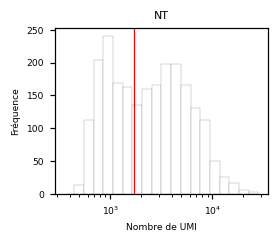

In [19]:
_,ax = plt.subplots(figsize=(2.5,2))
rnaseq.plotting.loghist(sc.obs["total_UMIs"], bins=20, ax=ax, linewidth=0.1, edgecolor='black', fc = "white");
# ax.set_xlim(200,25000)
plt.axvline(1700, linewidth = 0.8, c = 'red')
plt.title(new_sample_name)
plt.ylabel("Fréquence")
plt.xlabel("Nombre de UMI")
# plt.savefig(f"./figs/{prefix}_knee3.pdf");

Text(0.5, 0, 'Nombre de UMI')

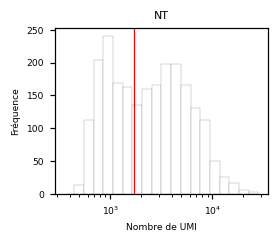

In [20]:
_,ax = plt.subplots(figsize=(2.5,2))
rnaseq.plotting.loghist(sc.obs["total_UMIs"], bins=20, ax=ax, linewidth=0.1, edgecolor='black', fc = "white");
# ax.set_xlim(200,25000)
plt.axvline(1700, linewidth = 0.8, c = 'red')
plt.title(new_sample_name)
plt.ylabel("Fréquence")
plt.xlabel("Nombre de UMI")
# plt.savefig(f"./figs/{prefix}_knee3.pdf");

Text(0.5, 0, 'Rmax')

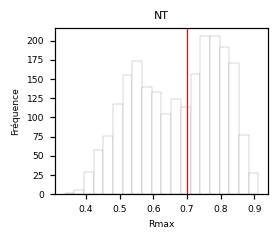

In [21]:
_,ax = plt.subplots(figsize=(2.5,2))
plt.hist(sc.obs["max_corr"], bins=20, linewidth=0.1, edgecolor='black', fc = "white");
plt.title(new_sample_name)
plt.axvline(0.7, linewidth = 0.8, c = 'red')
plt.ylabel("Fréquence")
plt.xlabel("Rmax")
# plt.savefig(f"./figs/{prefix}_knee3.pdf");

Text(0.5, 0, 'Rmax')

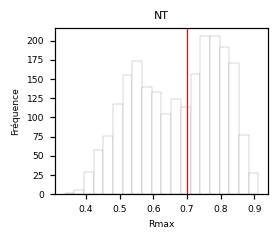

In [22]:
_,ax = plt.subplots(figsize=(2.5,2))
plt.hist(sc.obs["max_corr"], bins=20, linewidth=0.1, edgecolor='black', fc = "white");
plt.title(new_sample_name)
plt.axvline(0.7, linewidth = 0.8, c = 'red')
plt.ylabel("Fréquence")
plt.xlabel("Rmax")
# plt.savefig(f"./figs/{prefix}_knee3.pdf");

Text(0.5, 0, 'Fraction de Mt_rRNA')

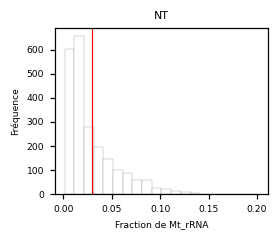

In [23]:
_,ax = plt.subplots(figsize=(2.5,2))
plt.hist(sc.obs["Mt_rRNA"], bins=20, linewidth=0.1, edgecolor='black', fc = "white");
plt.title(new_sample_name)
plt.axvline(0.03, linewidth = 0.8, c = 'red')
plt.ylabel("Fréquence")
plt.xlabel("Fraction de Mt_rRNA")
# plt.savefig(f"./figs/{prefix}_knee3.pdf");

Text(0.5, 0, 'Fraction de Mt_rRNA')

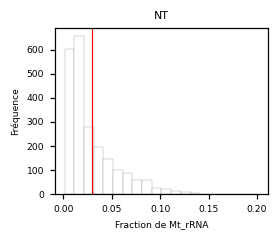

In [24]:
_,ax = plt.subplots(figsize=(2.5,2))
plt.hist(sc.obs["Mt_rRNA"], bins=20, linewidth=0.1, edgecolor='black', fc = "white");
plt.title(new_sample_name)
plt.axvline(0.03, linewidth = 0.8, c = 'red')
plt.ylabel("Fréquence")
plt.xlabel("Fraction de Mt_rRNA")
# plt.savefig(f"./figs/{prefix}_knee3.pdf");

### Explore sample

In [25]:
sc = sc_copy.copy()

In [26]:
metrics = ['total_UMIs', '#_genes', 'max_corr', 'MappingRate','DedupRate', 'mt_frac', 'rp_frac']
powers_metrics = [0.1,0.3,0.8,1.3,1.5,0.5,1.2]

biotypes = ['rRNA', 'Mt_rRNA', 'lncRNA', 'processed_pseudogene', 'protein_coding', 'G2M_score', 'hsp_frac', 'marker']
powers_biotypes = [1,0.5,1,0.5,1.8,0.5, 0.5, 1]

In [27]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

Normalization by total UMIs...
Log2 + 1 tranformation...


In [28]:
sc.obs["marker"] = sc.X.toarray()[:, sc.var["external_gene_name"].values == "TFF1"] # HSPA5 SERP1 SRP19

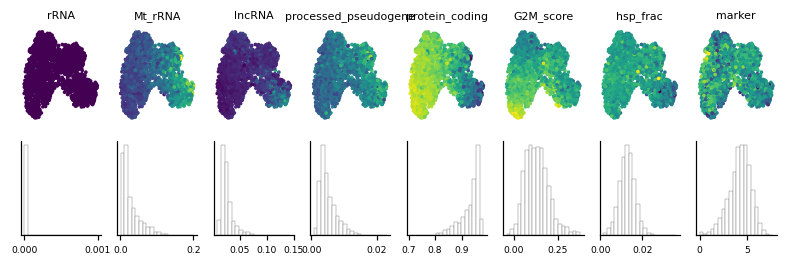

In [29]:
scatt = plt.subplots(figsize=(10,2.5), sharey=True)
for i,(c,p) in enumerate(zip(biotypes,powers_biotypes)):
    axi = plt.subplot(2,9,i+1)
    plt.title(c)
    plt.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], c = sc.obs[c], s = 2, norm = PowerNorm(p))
    plt.axis('off')

for j,c in enumerate(biotypes):
    axi = plt.subplot(2,9,i+j+3)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_yticks([])
    plt.hist(sc.obs[c],  bins = 20, color="white", edgecolor="gray", linewidth = 0.3);

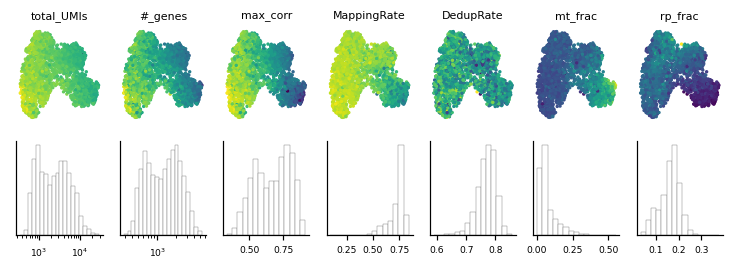

In [30]:
scatt = plt.subplots(figsize=(9.5,2.5), sharey=True)
for i,(c,p) in enumerate(zip(metrics,powers_metrics)):
    axi = plt.subplot(2,8,i+1)
    plt.title(c)
    plt.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], c = sc.obs[c], s = 1.5, norm = PowerNorm(p))
    plt.axis('off')

for j,c in enumerate(metrics):
    axi = plt.subplot(2,8,i+j+3)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_yticks([])
    if c in ["total_UMIs", "#_genes"] :
        rnaseq.plotting.loghist(sc.obs[c], bins=20, ax=axi, linewidth=0.3, color="white", edgecolor="gray");
    else :
        plt.hist(sc.obs[c],  bins = 15, color="white", edgecolor="gray", linewidth = 0.3);

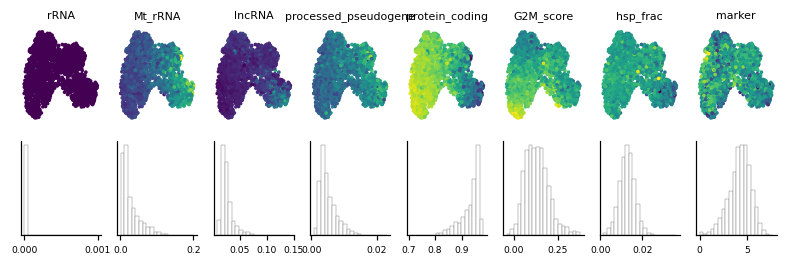

In [31]:
scatt = plt.subplots(figsize=(10,2.5), sharey=True)
for i,(c,p) in enumerate(zip(biotypes,powers_biotypes)):
    axi = plt.subplot(2,9,i+1)
    plt.title(c)
    plt.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], c = sc.obs[c], s = 2, norm = PowerNorm(p))
    plt.axis('off')

for j,c in enumerate(biotypes):
    axi = plt.subplot(2,9,i+j+3)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_yticks([])
    plt.hist(sc.obs[c],  bins = 20, color="white", edgecolor="gray", linewidth = 0.3);

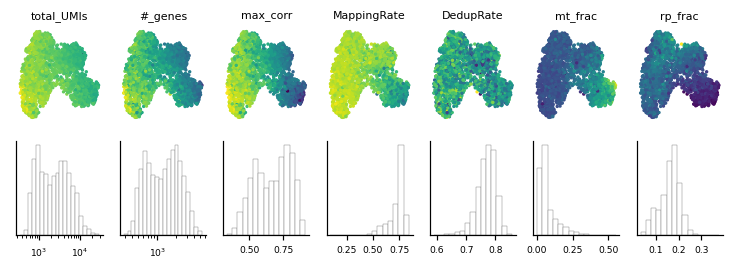

In [32]:
scatt = plt.subplots(figsize=(9.5,2.5), sharey=True)
for i,(c,p) in enumerate(zip(metrics,powers_metrics)):
    axi = plt.subplot(2,8,i+1)
    plt.title(c)
    plt.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], c = sc.obs[c], s = 1.5, norm = PowerNorm(p))
    plt.axis('off')

for j,c in enumerate(metrics):
    axi = plt.subplot(2,8,i+j+3)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_yticks([])
    if c in ["total_UMIs", "#_genes"] :
        rnaseq.plotting.loghist(sc.obs[c], bins=20, ax=axi, linewidth=0.3, color="white", edgecolor="gray");
    else :
        plt.hist(sc.obs[c],  bins = 15, color="white", edgecolor="gray", linewidth = 0.3);

### Filter sample

In [134]:
sc = sc_copy.copy()

In [135]:
metrics = ['total_UMIs', '#_genes', 'max_corr', 'MappingRate','DedupRate', 'mt_frac', 'rp_frac']
powers_metrics = [0.1,0.3,0.8,1.3,1.5,0.5,1.2]

biotypes = ['rRNA', 'Mt_rRNA', 'lncRNA', 'processed_pseudogene', 'protein_coding', 'G2M_score', 'hsp_frac', 'marker']
powers_biotypes = [1,0.7,0.5,0.5,1.8,0.5, 0.5, 1]

In [142]:
# sc._inplace_subset_obs(sc.obs["total_UMIs"] < 40000)
sc._inplace_subset_obs(sc.obs["total_UMIs"] > 1700)
# sc._inplace_subset_obs(sc.obs["Mt_rRNA"] < 0.02)
sc._inplace_subset_obs(sc.obs["mt_frac"] < 0.07)

In [143]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

Normalization by total UMIs...
Log2 + 1 tranformation...


In [144]:
sc.obs["marker"] = sc.X.toarray()[:, sc.var["external_gene_name"].values == "H2AC19"] # KRT19 MALAT1

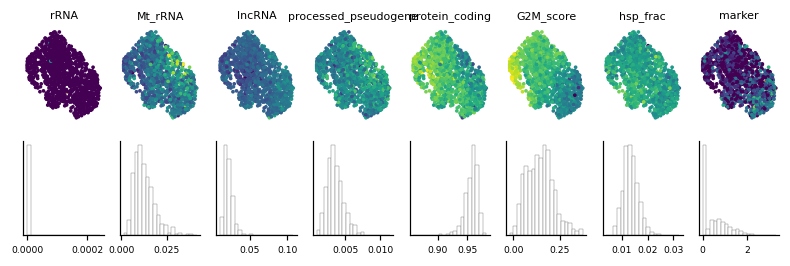

In [145]:
scatt = plt.subplots(figsize=(10,2.5), sharey=True)
for i,(c,p) in enumerate(zip(biotypes,powers_biotypes)):
    axi = plt.subplot(2,9,i+1)
    plt.title(c)
    plt.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], c = sc.obs[c], s = 2, norm = PowerNorm(p))
    plt.axis('off')

for j,c in enumerate(biotypes):
    axi = plt.subplot(2,9,i+j+3)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_yticks([])
    plt.hist(sc.obs[c],  bins = 20, color="white", edgecolor="gray", linewidth = 0.3);

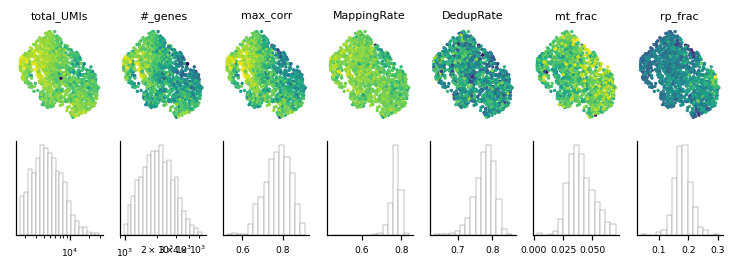

In [146]:
scatt = plt.subplots(figsize=(9.5,2.5), sharey=True)
for i,(c,p) in enumerate(zip(metrics,powers_metrics)):
    axi = plt.subplot(2,8,i+1)
    plt.title(c)
    plt.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], c = sc.obs[c], s = 1.5, norm = PowerNorm(p))
    plt.axis('off')

for j,c in enumerate(metrics):
    axi = plt.subplot(2,8,i+j+3)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_yticks([])
    if c in ["total_UMIs", "#_genes"] :
        rnaseq.plotting.loghist(sc.obs[c], bins=20, ax=axi, linewidth=0.3, color="white", edgecolor="gray");
    else :
        plt.hist(sc.obs[c],  bins = 15, color="white", edgecolor="gray", linewidth = 0.3);

In [147]:
sc.X.shape

(1189, 60240)

### Save filtered data

In [148]:
rnaseq.readwrite.write_filtered(sc)

/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'samples' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'project_id' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in

In [590]:
del sc, sc_copy

### Heterogeneity analysis

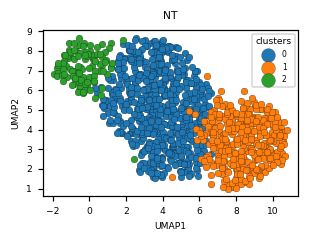

In [36]:
scanpy.tl.leiden(sc, resolution=0.3)

scatt,_ = plt.subplots(figsize=(3,2))

rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["leiden"], \
    s = 20, xlabel="UMAP1", ylabel="UMAP2", color_title = "clusters",\
    title = new_sample_name, linewidth=0.15, fig = scatt)

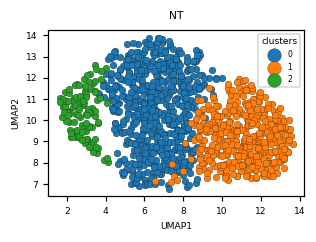

In [35]:
scanpy.tl.leiden(sc, resolution=0.3)

scatt,_ = plt.subplots(figsize=(3,2))

rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["leiden"], \
    s = 20, xlabel="UMAP1", ylabel="UMAP2", color_title = "clusters",\
    title = new_sample_name, linewidth=0.15, fig = scatt)

In [37]:
rnaseq.setup.annotate_genes(sc, 'description')

Annotating description using Biomart (Ensembl Genes 100, 'hsapiens_gene_ensembl')...


In [38]:
gene_exp = pd.DataFrame(sc.X.toarray().T, columns = sc.obs["CB"].values)
class_vector = (sc.obs["leiden"].values == '1').astype(str)
class_vector = np.where(class_vector == 'True', "cluster", class_vector) 
class_vector = np.where(class_vector == 'False', "rest", class_vector) 

In [39]:
idx = np.argsort(class_vector)
gene_exp = gene_exp[gene_exp.columns[idx]]
gene_exp.insert(0, "DESCRIPTION", sc.var["description"].values, True)
gene_exp.insert(0, "NAME", sc.var["external_gene_name"].values, True)

class_vector = list(class_vector[idx])

In [40]:
gs_res = gp.gsea(gene_exp, # ordata='./P53_resampling_data.txt'
                 'MSigDB_Hallmark_2020', # enrichr library names
                  class_vector,
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=100, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=4, seed= 7,
                 format='png')

2021-12-18 21:31:12,820 Warning: dropping duplicated gene names, only keep the first values


In [42]:
res = gs_res.res2d.sort_values(by='nes', ascending=False)
res = res.loc[res.index[(res['fdr'].values < 0.05) & (res['pval'].values < 0.05)]]

In [43]:
res

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Estrogen Response Early,0.409026,2.099807,0.0,0.000000,200,199,KRT19;FOS;TFF3;BAG1;KRT15;KRT8;TMEM164;ADCY1;E...,KRT19;FOS;TFF3;BAG1;KRT15;KRT8;TMEM164;ADCY1;E...
TNF-alpha Signaling via NF-kB,0.400095,2.040524,0.0,0.008889,200,160,FOS;BTG1;JUNB;TSC22D1;PNRC1;BTG2;RHOB;IFNGR2;P...,FOS;BTG1;JUNB;TSC22D1;PNRC1;BTG2;RHOB;IFNGR2;P...
Hypoxia,0.350174,1.816689,0.0,0.029630,200,163,DDIT4;SELENBP1;FOS;CITED2;CAV1;BTG1;PNRC1;ISG2...,DDIT4;SELENBP1;FOS;CITED2;CAV1;BTG1;PNRC1;ISG2...
Apical Surface,0.450470,1.659120,0.0,0.049778,44,28,SULF2;HSPB1;GATA3;LYPD3;LYN;SHROOM2;CROCC;ATP6...,SULF2;HSPB1;GATA3;LYPD3;LYN;SHROOM2;CROCC
Myogenesis,0.339065,1.648443,0.0,0.047407,200,121,APOD;EIF4A2;BAG1;CLU;MB;RIT1;GSN;TNNC2;PLXNB2;...,APOD;EIF4A2;BAG1;CLU;MB;RIT1;GSN;TNNC2;PLXNB2;...
p53 Pathway,0.319995,1.627062,0.0,0.043175,200,183,DDIT4;FOS;TXNIP;S100A10;BTG1;PERP;TSC22D1;IP6K...,DDIT4;FOS;TXNIP;S100A10;BTG1;PERP;TSC22D1;IP6K...
KRAS Signaling Up,0.325681,1.557880,0.0,0.042222,200,102,APOD;MAFB;INHBA;PCSK1N;TSPAN1;GPNMB;TRIB2;KLF4...,APOD;MAFB;INHBA;PCSK1N;TSPAN1;GPNMB;TRIB2;KLF4...
UV Response Dn,0.325833,1.554054,0.0,0.043457,144,125,CITED2;CAV1;IGFBP5;PIK3R3;IGF1R;ATP2B4;DBP;WDR...,CITED2;CAV1;IGFBP5;PIK3R3;IGF1R;ATP2B4;DBP;WDR...
Epithelial Mesenchymal Transition,0.317725,1.536071,0.0,0.040889,200,117,CD59;RHOB;MGP;CADM1;PMEPA1;PTHLH;INHBA;CD44;TI...,CD59;RHOB;MGP;CADM1;PMEPA1;PTHLH;INHBA;CD44;TI...


In [42]:
res

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Estrogen Response Early,0.410485,2.126069,0.000000,0.000000,200,199,KRT19;FOS;KRT8;TFF3;DEPTOR;NPY1R;KRT15;AQP3;BA...,KRT19;FOS;KRT8;TFF3;DEPTOR;NPY1R;KRT15;AQP3;BA...
TNF-alpha Signaling via NF-kB,0.432363,2.081464,0.000000,0.000000,200,161,FOS;BTG1;PNRC1;JUNB;PMEPA1;RHOB;TSC22D1;ZFP36;...,FOS;BTG1;PNRC1;JUNB;PMEPA1;RHOB;TSC22D1;ZFP36;...
Apical Surface,0.469227,1.780801,0.000000,0.032316,44,28,SULF2;HSPB1;GATA3;LYPD3;LYN;SHROOM2;CROCC;ATP6...,SULF2;HSPB1;GATA3;LYPD3;LYN
Hedgehog Signaling,0.485413,1.683651,0.000000,0.032316,36,24,NRCAM;AMOT;LDB1;PTCH1;PML;NRP2;OPHN1;CDK6;HEY2...,NRCAM;AMOT;LDB1;PTCH1;PML;NRP2;OPHN1;CDK6;HEY2
Hypoxia,0.342916,1.675890,0.000000,0.029084,200,163,DDIT4;FOS;SELENBP1;CITED2;BTG1;CAV1;PNRC1;ISG2...,DDIT4;FOS;SELENBP1;CITED2;BTG1;CAV1;PNRC1;ISG2...
UV Response Dn,0.345253,1.602215,0.000000,0.032316,144,125,CITED2;CAV1;IGFBP5;PIK3R3;ATP2B4;NR1D2;IGF1R;W...,CITED2;CAV1;IGFBP5;PIK3R3;ATP2B4;NR1D2;IGF1R;W...
heme Metabolism,-0.287721,-1.405111,0.000000,0.046407,200,158,SELENBP1;AQP3;BTG2;IGSF3;TFDP2;MARCHF8;KAT2B;B...,CPOX;XK;CDR2;SLC30A1;ACSL6;MOSPD1;LAMP2;MBOAT2...
Apoptosis,-0.295252,-1.407276,0.033333,0.047462,161,126,TXNIP;HSPB1;CAV1;CTH;RHOB;ISG20;BTG2;GSN;ANXA1...,LMNA;BCL2L10;IER3;RELA;PAK1;BCL2L1;PEA15;GPX3;...
Estrogen Response Late,-0.305694,-1.434186,0.000000,0.045302,200,192,KRT19;FOS;KLK11;CAV1;TFF3;ISG20;DNAJC12;NPY1R;...,METTL3;NMU;SFN;SLC22A5;IL6ST;DHRS2;MOCS2;RPS6K...


In [44]:
sc.var_names = sc.var["external_gene_name"].values
scanpy.tl.rank_genes_groups(sc, groupby="leiden", n_genes=len(sc.var_names),rankby_abs=True, method="wilcoxon")

/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'samples' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'project_id' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in

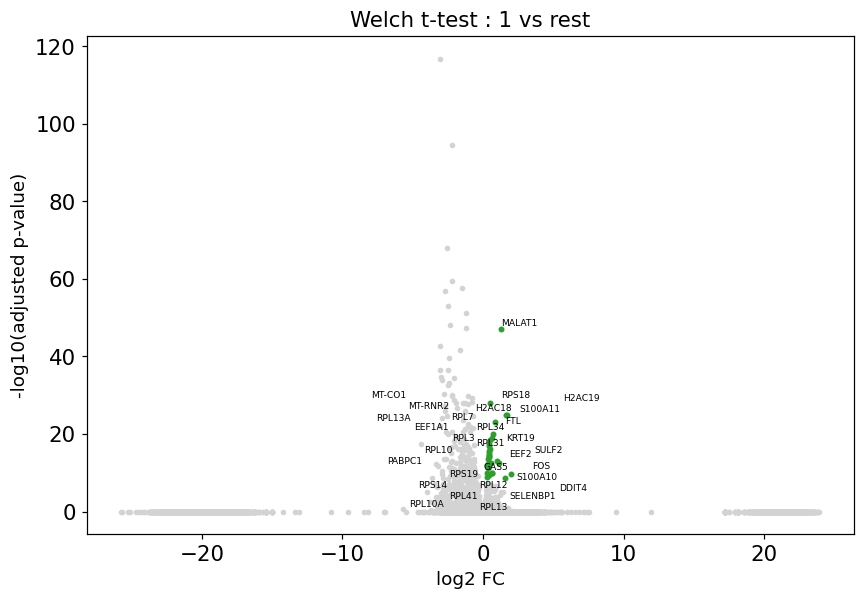

In [46]:
rnaseq.dea.volcano_plot(sc, group="1", show_genes = 'up', top=30)

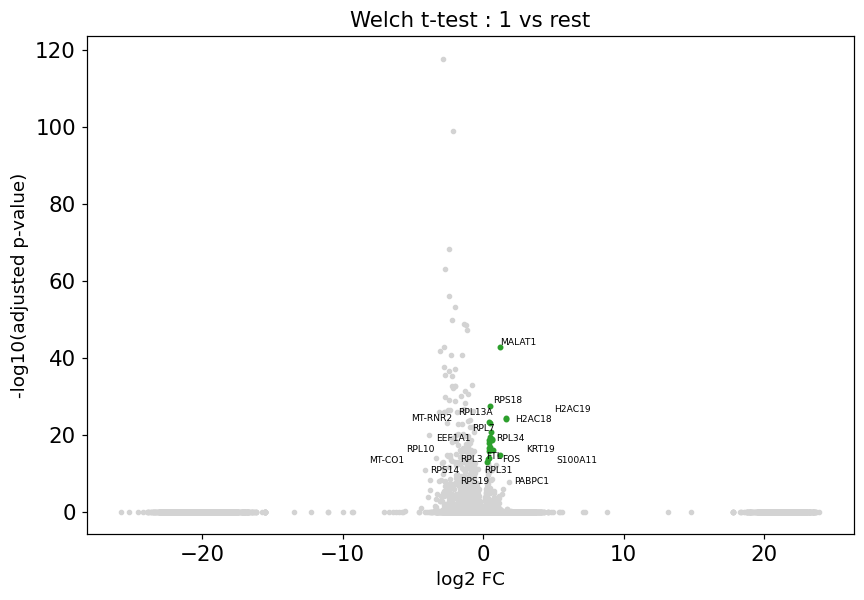

In [45]:
rnaseq.dea.volcano_plot(sc, group="1", show_genes = 'up', top=20)

/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/dea.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = pd.DataFrame(np.array(data[gene_set_library])[:,1:], columns=["Term", "P-value", "Z-score", "Combined Score", "Genes", "Adjusted P-value", "Old P-value", "Old adjusted P-value"])
/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/dea.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(abs(tick)) for tick in ticks])


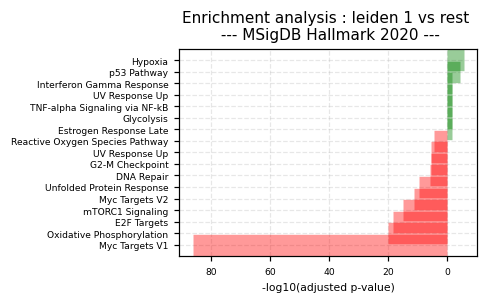

,index,Term,P-value,Z-score,Combined Score,Genes,Adjusted P-value,Old P-value,Old adjusted P-value,color
0,0,Myc Targets V1,0.0,30.431178,6155.053415,"[EIF4A1, RPL34, HNRNPU, HNRNPR, PHB2, RPL6, FBL, PSMD7, SNRPD2, SNRPD1, RUVBL2, PSMD1, SNRPD3, EIF1AX, RPS5, RPS6, ILF2, VDAC3, SRSF2, SNRPG, NHP2, SRSF3, VDAC1, ERH, HPRT1, PPIA, SRSF7, SNRPA, KPNB1, SET, PSMD14, NOLC1, PHB, GSPT1, PRDX4, CYC1, XRCC6, NOP16, CBX3, PA2G4, MRPL23, EIF2S2, EIF2S1, LSM2, AIMP2, LSM7, CDK4, HNRNPD, RNPS1, EIF4G2, HSP90AB1, RPLP0, SYNCRIP, YWHAQ, C1QBP, RACK1, DHX15, MRPL9, CCT2, VBP1, NME1, PSMA6, PSMA4, PSMA2, PABPC1, SRSF1, DDX21, U2AF1, COX5A, PSMA7, HSPD1, SRM, PPM1G, PSMB2, PSMB3, TRA2B, POLD2, RPS3, RPS2, BUB3, EIF4E, CCT4, NOP56, NPM1, HNRNPA3, PTGES3, CNBP, DEK, HSPE1, APEX1, SERBP1, POLE3, PRPF31, HDGF, SSBP1, TARDBP, ABCE1, EIF3B]",-86.187807,0,0,red
1,1,Oxidative Phosphorylation,0.0,7.930245,388.037554,"[COX7B, MRPS15, ECHS1, UQCRB, NDUFB6, MRPS11, COX4I1, MRPS12, COX17, ATP5MC2, ATP5MC3, MRPL15, UQCR10, TIMM10, PHB2, COX5A, HSD17B10, MRPL11, TIMM50, TIMM17A, UQCRFS1, POLR2F, CYC1, ATP5MG, IDH3A, COX8A, NDUFA9, ATP6V1G1, ATP6V0B, PDHA1, NDUFA6, MDH1, IDH2, NDUFC2, COX6C, NDUFS8, FDX1, UQCRC1, VDAC3, NDUFS3, VDAC2, VDAC1, SLC25A5]",-19.898432,0,0,red
2,2,E2F Targets,0.0,7.442984,333.653707,"[SLBP, NUP107, POP7, PRKDC, CSE1L, SRSF1, NOLC1, PSIP1, SMC6, SMC3, GSPT1, POLD3, PNN, SYNCRIP, PRDX4, TRA2B, POLD2, RBBP7, NOP56, XRCC6, EED, HMGA1, RPA2, PA2G4, KIF22, DEK, SSRP1, PAICS, EIF2S1, NME1, POLE4, ILF3, PHF5A, DIAPH3, MTHFD2, CDK4, HNRNPD, SRSF2, DCTPP1, EZH2, SNRPB]",-18.292441,0,0,red
3,3,mTORC1 Signaling,0.0,6.511355,240.958186,"[PSMD12, PSMD14, RPN1, ARPC5L, GMPS, TMEM97, ENO1, SLC1A5, HSPD1, STIP1, EBP, PSMB5, FADS1, CYB5B, XBP1, TPI1, SDF2L1, PNO1, PDAP1, EIF2S2, HSPE1, SYTL2, CCT6A, PSMA3, PFKL, PSMA4, MTHFD2, DDIT4, HMBS, PSMC2, TCEA1, CD9, PSMG1, HPRT1, EEF1E1, PPIA, GLA]",-15.020282,0,0,red
4,4,Myc Targets V2,0.0,12.631487,354.10757,"[NOP56, NPM1, NOP16, CBX3, NOLC1, IMP4, TMEM97, PHB, PA2G4, HSPE1, WDR43, SRM, HSPD1, AIMP2, CDK4, MRTO4, FARSA, DCTPP1]",-11.220648,0,0,red
5,5,Unfolded Protein Response,0.0,6.80787,160.817984,"[EIF4A2, NOP56, EIF4A1, XBP1, NPM1, FUS, POP4, EIF4A3, LSM1, NOLC1, EEF2, PDIA6, EIF2S1, RPS14, MTHFD2, DKC1, DDIT4, NHP2, EIF4EBP1, BANF1, EIF4E, PAIP1]",-9.384002,0,0,red
6,6,DNA Repair,0.0,4.310841,64.418505,"[GTF2A2, COX17, ADRM1, UPF3B, RPA2, SSRP1, NME1, NT5C3A, POLD3, POLE4, DGUOK, BOLA2, POLR2E, POLR2F, POLR2G, HPRT1, POLR2H, POLR2I, RAE1, POLR2K]",-5.681710,0,0,red
7,7,G2-M Checkpoint,0.000001,3.64815,51.997981,"[PRMT5, HSPA8, AMD1, SRSF1, HMGA1, HNRNPU, NOLC1, RPA2, KIF22, GSPT1, SYNCRIP, MT2A, ILF3, SNRPD1, DKC1, CDK4, NCL, TRA2B, HNRNPD, SRSF2, BUB3, KPNB1, EZH2]",-5.439985,0,0,red
8,8,UV Response Up,0.000001,4.059242,57.225243,"[CYB5B, BTG1, RPN1, AMD1, HNRNPU, DDX21, PDAP1, FOS, MRPL23, DNAJA1, STIP1, DNAJB1, EIF5, PSMC3, POLE3, AP2S1, POLR2H, FKBP4, BID, JUNB]",-5.423504,0,0,red
9,9,Reactive Oxygen Species Pathway,0.000006,7.11483,84.982576,"[PRDX2, NQO1, PRDX4, NDUFA6, SELENOS, GLRX2, TXN, JUNB, FTL, SOD1]",-4.534186,0,0,red


In [47]:
rnaseq.dea.enrichr(sc, group="1",libraries="MSigDB_Hallmark_2020")

/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/dea.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = pd.DataFrame(np.array(data[gene_set_library])[:,1:], columns=["Term", "P-value", "Z-score", "Combined Score", "Genes", "Adjusted P-value", "Old P-value", "Old adjusted P-value"])


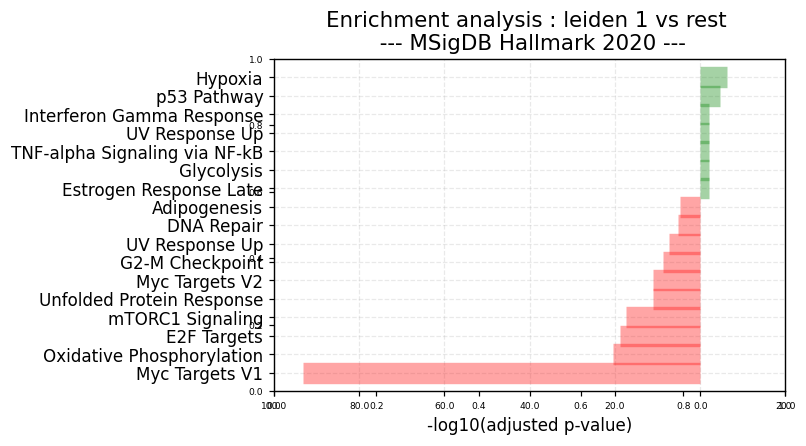

,index,Term,P-value,Z-score,Combined Score,Genes,Adjusted P-value,Old P-value,Old adjusted P-value,color
0,0,Myc Targets V1,0.0,30.753942,6708.54592,"[EIF4A1, RPL34, HNRNPU, HNRNPR, PWP1, PHB2, RPL6, PSMD8, FBL, SNRPD1, RUVBL2, PSMD1, SNRPD3, EIF1AX, RPS5, RPS6, MRPS18B, ILF2, TUFM, VDAC3, SRSF2, SNRPG, NHP2, SRSF3, VDAC1, ERH, HPRT1, PPIA, SRSF7, SNRPA, KPNB1, SET, PSMD14, PHB, GSPT1, PRDX3, PRDX4, CYC1, XRCC6, NOP16, CBX3, PA2G4, MRPL23, EIF2S2, EIF2S1, SRPK1, LSM2, AIMP2, LSM7, CDK4, RNPS1, EIF4G2, HSP90AB1, RPLP0, SYNCRIP, XPO1, YWHAQ, C1QBP, RACK1, DHX15, MRPL9, CCT2, VBP1, RAD23B, NME1, PSMA6, PSMA4, PSMA2, TCP1, ETF1, PABPC1, ODC1, SRSF1, DDX21, U2AF1, COX5A, PSMA7, HSPD1, SRM, PPM1G, PSMB2, PSMB3, TRA2B, POLD2, RPS3, RPS2, BUB3, IARS1, CCT7, EIF4E, CCT4, NOP56, NPM1, HNRNPA3, PTGES3, CNBP, DEK, HSPE1, PSMC6, PSMC4, ...]",-93.072561,0,0,red
1,1,Oxidative Phosphorylation,0.0,7.40175,371.578761,"[COX7B, MRPS15, ECHS1, UQCRB, NDUFB6, MRPS11, COX4I1, MRPS12, COX17, ATP5MC2, ATP5MC3, MRPL15, UQCR10, TIMM10, PHB2, COX5A, HSD17B10, MRPL11, TIMM50, PRDX3, GRPEL1, TIMM17A, UQCRFS1, POLR2F, CYC1, ATP5MG, IDH3A, COX8A, NDUFA9, ATP6V0B, PDHA1, MDH1, NDUFA5, MDH2, IDH2, NDUFC2, COX6C, SDHA, NDUFS8, FDX1, UQCRC1, VDAC3, NDUFS3, VDAC2, VDAC1, ACO2, SLC25A5]",-20.440497,0,0,red
2,2,E2F Targets,0.0,6.976918,322.56842,"[SLBP, DNMT1, NUP107, POP7, PRKDC, SHMT1, CSE1L, SRSF1, AK2, SMC6, CTCF, SMC3, IPO7, GSPT1, UNG, POLD3, PNN, SYNCRIP, PRDX4, XPO1, CHEK2, TRA2B, POLD2, RBBP7, LBR, NOP56, XRCC6, HMGA1, RPA2, PA2G4, KIF22, DEK, SSRP1, PAICS, EIF2S1, NME1, ILF3, MTHFD2, UBE2S, CDK4, SRSF2, RAD1, DCTPP1, EZH2, SNRPB]",-18.893385,0,0,red
3,3,mTORC1 Signaling,0.0,6.564614,278.233704,"[PSMD12, PSMD14, SHMT2, RPN1, ARPC5L, GMPS, TMEM97, ENO1, SLC1A5, UNG, HSPD1, STIP1, EBP, PSMB5, FADS1, CYB5B, ACTR2, TPI1, SDF2L1, PNO1, PDAP1, EIF2S2, HSPE1, UCHL5, SYTL2, CCT6A, PSMA3, PFKL, PSMA4, PSMC6, MTHFD2, PSMC4, DDIT4, HMBS, PSMC2, TCEA1, CD9, PSMG1, ETF1, HPRT1, EEF1E1, PPIA, GLA]",-17.346380,0,0,red
4,4,Unfolded Protein Response,0.0,7.038484,196.072523,"[EIF4A2, EIF4A1, POP4, EIF4A3, RPS14, KIF5B, EXOSC9, EIF4EBP1, BANF1, IARS1, EIF4E, PAIP1, NOP56, NPM1, FUS, NFYB, LSM1, EEF2, PDIA6, EIF2S1, LSM4, MTHFD2, DKC1, DDIT4, NHP2, TARS1]",-11.134444,0,0,red
5,5,Myc Targets V2,0.0,11.404293,314.51842,"[NOP56, NPM1, NOP16, CBX3, IMP4, TMEM97, PHB, PA2G4, HSPE1, WDR43, SRM, HSPD1, UNG, AIMP2, TCOF1, CDK4, MRTO4, FARSA, DCTPP1]",-11.092779,0,0,red
6,6,G2-M Checkpoint,0.0,4.32831,95.187379,"[ODC1, AMD1, SRSF1, HNRNPU, CTCF, GSPT1, SYNCRIP, MT2A, XPO1, SNRPD1, KIF5B, TRA2B, CDC27, BUB3, SRSF10, LBR, PRMT5, HSPA8, HMGA1, RPA2, KIF22, RAD23B, ILF3, DKC1, UBE2S, CDK4, NCL, SRSF2, TOP1, KPNB1, EZH2]",-8.733262,0,0,red
7,7,UV Response Up,0.0,4.410919,81.389415,"[BTG1, RPN1, AMD1, CLTB, HNRNPU, DDX21, STIP1, DNAJB1, GRPEL1, AP2S1, POLR2H, BID, JUNB, CYB5B, PDAP1, FOS, MRPL23, DNAJA1, EIF5, PSMC3, PRPF3, POLE3, SELENOW, PPT1, TARS1]",-7.253848,0,0,red
8,8,DNA Repair,0.000001,3.802112,51.886988,"[GTF2A2, COX17, ADRM1, UPF3B, RPA2, SSRP1, NME1, POLD3, DGUOK, POLR2C, BOLA2, POLR2E, POLR2F, POLR2G, HPRT1, POLR2H, UMPS, POLR2I, RAE1, POLR2K, NELFE]",-5.218253,0,0,red
9,9,Adipogenesis,0.000003,3.18876,40.066214,"[COX8A, RTN3, COX7B, ECHS1, NDUFA5, MDH2, AK2, TALDO1, MRPL15, UQCR10, SLC1A5, DNAJC15, SOD1, PRDX3, PFKL, GRPEL1, UQCRC1, NDUFS3, UBQLN1, ESYT1, CYC1, ACO2, HADH, IDH3A]",-4.794078,0,0,red


In [54]:
rnaseq.dea.enrichr(sc, group="1",libraries="MSigDB_Hallmark_2020")

### Emptydrops

In [73]:
sc = sc_copy.copy()

In [84]:
rnaseq.setup.annotate_samples(sc, samples_annot_name = "total_UMIs", samples_annot = sc.X.toarray().sum(1).ravel(),ow=True)

Annotating total_UMIs...


In [74]:
rnaseq.setup.load_layer(sc,"raw")

In [48]:
from emptydrops import find_nonambient_barcodes
from emptydrops.matrix import CountMatrix

In [75]:
matrix = CountMatrix.from_anndata(sc)

In [95]:
find_nonambient_barcodes(
    matrix,          # Full expression matrix
    sc.obs_names.values.astype(bytes),   # (iterable of str): Strings of initially-called cell barcodes
)

Median UMIs of initial cell calls: 2318.0
Min UMIs: 1000


In [91]:
matrix.

<60240x2267 sparse matrix of type '<class 'numpy.int64'>'
	with 3447379 stored elements in Compressed Sparse Column format>

In [85]:
sc.obs["total_UMIs"]

GTTGATAGTAAA    3362.000000
CGCGCTTGCGAG    1647.999878
GAGGTCGCACCC    1061.000000
ATCCTGATGATG    6164.000000
CCTCAAGTTCCC    7744.999512
                   ...     
CCTCCATCGGCA    1403.000000
AATGAAAGCATT     942.000000
GCCAGCCGCTGG    2227.000000
CCCCCACATGAA     730.000000
AGCGACTACCGT    1337.000000
Name: total_UMIs, Length: 2267, dtype: float32